In [ ]:
#Task 2 Data Insights

In [1]:
import pandas as pd
import numpy as np

In [9]:
trans=pd.read_excel("/Users/xuqinyi/Desktop/KPMG Data Analytics Virtual/Clean KPMG Data.xlsx",sheet_name='Transactions')
new_customer=pd.read_excel("/Users/xuqinyi/Desktop/KPMG Data Analytics Virtual/Clean KPMG Data.xlsx",sheet_name='NewCustomerList')
cus_demo=pd.read_excel("/Users/xuqinyi/Desktop/KPMG Data Analytics Virtual/Clean KPMG Data.xlsx",sheet_name='CustomerDemographic')
cus_address=pd.read_excel("/Users/xuqinyi/Desktop/KPMG Data Analytics Virtual/Clean KPMG Data.xlsx",sheet_name='CustomerAddress')

In [11]:
col=['Unnamed: 0']
trans.drop(col,axis=1,inplace=True)
new_customer.drop(col,axis=1,inplace=True)
cus_demo.drop(col,axis=1,inplace=True)
cus_address.drop(col,axis=1,inplace=True)

In [14]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [15]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [16]:
trans["Profit"]=trans["list_price"]-trans["standard_cost"]

In [17]:
#Check if the calculation is correct
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


In [ ]:
#Merge the transactions table with customerdemo table to calculate the total spending of each customer

In [18]:
cus_1=cus_demo.merge(trans,left_on='customer_id',right_on='customer_id',how='left')
cus_2=cus_1.merge(cus_address,left_on='customer_id',right_on='customer_id',how='left')

In [19]:
cus_2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,product_size,list_price,standard_cost,product_first_sold_date,Profit,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,235.63,125.07,2005-05-10,110.56,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,1577.53,826.51,2008-03-19,751.02,060 Morning Avenue,2016.0,NSW,Australia,10.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,small,1720.70,1531.42,2003-07-21,189.28,060 Morning Avenue,2016.0,NSW,Australia,10.0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,360.40,270.30,2003-09-09,90.10,060 Morning Avenue,2016.0,NSW,Australia,10.0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,71.49,53.62,2005-08-09,17.87,060 Morning Avenue,2016.0,NSW,Australia,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20499,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,...,NaN,NaN,NaN,NaT,NaN,0 Transport Center,3977.0,VIC,Australia,6.0
20500,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,...,NaN,NaN,NaN,NaT,NaN,4 Dovetail Crossing,2350.0,NSW,Australia,2.0
20501,3998,Sarene,Woolley,Unknown,60,NaT,Assistant Manager,IT,High Net Worth,N,...,NaN,NaN,NaN,NaT,NaN,736 Roxbury Junction,2540.0,NSW,Australia,6.0
20502,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,...,NaN,NaN,NaN,NaT,NaN,1482 Hauk Trail,3064.0,VIC,Australia,3.0


In [ ]:
#Using RFM Model to do customer Segmentation

In [20]:
recency=cus_2.groupby('customer_id')['transaction_date'].max()
print(recency)

customer_id
1      2017-12-23
2      2017-08-24
3      2017-09-19
4      2017-06-18
5      2017-12-14
          ...    
3996          NaT
3997          NaT
3998          NaT
3999          NaT
4000          NaT
Name: transaction_date, Length: 4000, dtype: datetime64[ns]


In [21]:
RFM_info=recency.to_frame()
RFM_info.reset_index(inplace=True)
RFM_info = RFM_info.rename(columns = {'index':'customer_id'})

In [22]:
RFM_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       4000 non-null   int64         
 1   transaction_date  3493 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 62.6 KB


In [23]:
curr_time = pd.to_datetime("now")
RFM_info['Recency']=(curr_time-RFM_info['transaction_date']).dt.days
# RFM_info['Recency']=RFM_info['Recency'].dt.days

In [24]:
#Calculate each customer's profit
Profit=cus_2.groupby('customer_id')['Profit'].sum().to_frame()
Profit.reset_index(inplace=True)
Profit=Profit.rename(columns = {'index':'customer_id'})
Profit

,customer_id,Profit
0,1,3018.09
1,2,2226.26
2,3,3362.81
3,4,220.57
4,5,2394.94
...,...,...
3995,3996,0.00
3996,3997,0.00
3997,3998,0.00
3998,3999,0.00


In [25]:
#Calculate each customer's purchase frequency
Freq=cus_2.groupby('customer_id')['product_id'].count().to_frame()
Freq.reset_index(inplace=True)
Freq=Freq.rename(columns = {'index':'customer_id','product_id':'Frequency'})
Freq

,customer_id,Frequency
0,1,11
1,2,3
2,3,8
3,4,2
4,5,6
...,...,...
3995,3996,0
3996,3997,0
3997,3998,0
3998,3999,0


In [26]:
RFM=RFM_info.merge(Profit, left_on='customer_id',right_on='customer_id',how='left').merge(Freq, left_on='customer_id',right_on='customer_id',how='left')

In [27]:
RFM.head()

,customer_id,transaction_date,Recency,Profit,Frequency
0,1,2017-12-23,1661.0,3018.09,11
1,2,2017-08-24,1782.0,2226.26,3
2,3,2017-09-19,1756.0,3362.81,8
3,4,2017-06-18,1849.0,220.57,2
4,5,2017-12-14,1670.0,2394.94,6


/Users/xuqinyi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/xuqinyi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/xuqinyi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

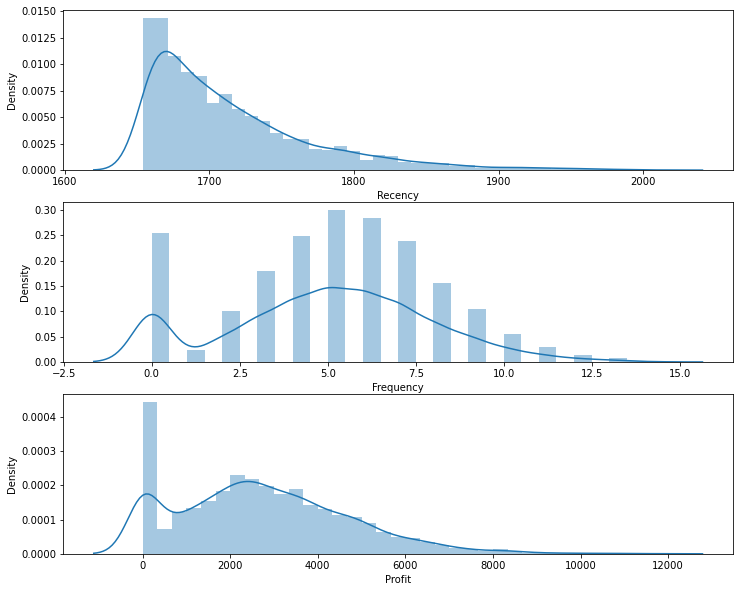

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Plotting RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFM['Profit'])
# Show the plot
plt.show()

In [29]:
# Create labels for Recency, Frequency, Money
r_labels = range(1, 5, 1); f_labels = range(4, 0,-1)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(RFM['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(RFM['Frequency'], q=4, labels=f_labels)
# Create labels for MonetaryValue
m_labels = range(4, 0,-1)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(RFM['Profit'], q=4, labels=m_labels)
# Create new columns R and F 
RFM = RFM.assign(R = r_groups.values, F = f_groups.values,M = m_groups.values)
RFM.head()

,customer_id,transaction_date,Recency,Profit,Frequency,R,F,M
0,1,2017-12-23,1661.0,3018.09,11,1,1,2
1,2,2017-08-24,1782.0,2226.26,3,4,4,3
2,3,2017-09-19,1756.0,3362.81,8,4,1,2
3,4,2017-06-18,1849.0,220.57,2,4,4,4
4,5,2017-12-14,1670.0,2394.94,6,1,2,3


In [30]:
RFM['R'] = pd.to_numeric(RFM['R'],errors='coerce')
RFM['F'] = pd.to_numeric(RFM['F'],errors='coerce')
RFM['M'] = pd.to_numeric(RFM['M'],errors='coerce')
RFM['RFM_Segment_Concat']=RFM['R']*100+RFM['F']*10+RFM['M']

In [31]:
RFM.head()

,customer_id,transaction_date,Recency,Profit,Frequency,R,F,M,RFM_Segment_Concat
0,1,2017-12-23,1661.0,3018.09,11,1.0,1,2,112.0
1,2,2017-08-24,1782.0,2226.26,3,4.0,4,3,443.0
2,3,2017-09-19,1756.0,3362.81,8,4.0,1,2,412.0
3,4,2017-06-18,1849.0,220.57,2,4.0,4,4,444.0
4,5,2017-12-14,1670.0,2394.94,6,1.0,2,3,123.0


In [32]:
r_labels = range(1, 5, 1)
# Assign these labels to 4 equal percentile groups 
s_groups = pd.qcut(RFM['RFM_Segment_Concat'], q=4, labels=r_labels)

In [33]:
RFM = RFM.assign(R_score_group=s_groups.values)
RFM['total_score']= RFM['R']+ RFM['F']+ RFM['M']
RFM.head()

,customer_id,transaction_date,Recency,Profit,Frequency,R,F,M,RFM_Segment_Concat,R_score_group,total_score
0,1,2017-12-23,1661.0,3018.09,11,1.0,1,2,112.0,1,4.0
1,2,2017-08-24,1782.0,2226.26,3,4.0,4,3,443.0,4,11.0
2,3,2017-09-19,1756.0,3362.81,8,4.0,1,2,412.0,4,7.0
3,4,2017-06-18,1849.0,220.57,2,4.0,4,4,444.0,4,12.0
4,5,2017-12-14,1670.0,2394.94,6,1.0,2,3,123.0,1,6.0


In [34]:
RFM['customer_class'] = np.where(RFM['R_score_group']==1, 'Platimum Customer',
              np.where(RFM['R_score_group']==2, 'Silver Customer',
              np.where(RFM['R_score_group']==3, 'Gold Customer','Brownz Customer')))

In [35]:
RFM.head()

,customer_id,transaction_date,Recency,Profit,Frequency,R,F,M,RFM_Segment_Concat,R_score_group,total_score,customer_class
0,1,2017-12-23,1661.0,3018.09,11,1.0,1,2,112.0,1,4.0,Platimum Customer
1,2,2017-08-24,1782.0,2226.26,3,4.0,4,3,443.0,4,11.0,Brownz Customer
2,3,2017-09-19,1756.0,3362.81,8,4.0,1,2,412.0,4,7.0,Brownz Customer
3,4,2017-06-18,1849.0,220.57,2,4.0,4,4,444.0,4,12.0,Brownz Customer
4,5,2017-12-14,1670.0,2394.94,6,1.0,2,3,123.0,1,6.0,Platimum Customer


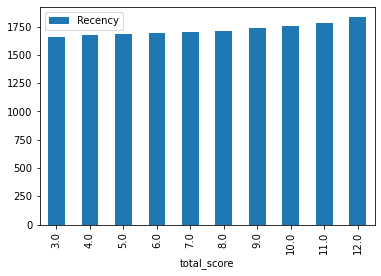

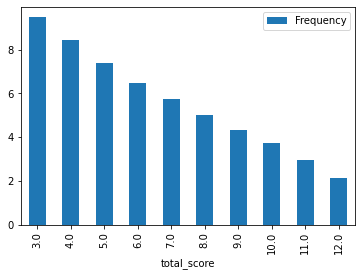

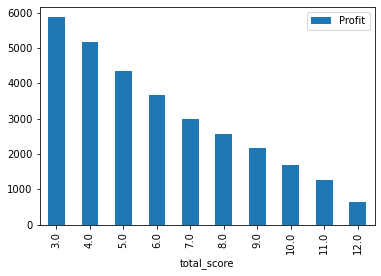

In [36]:
RFM.groupby('total_score').agg('Recency').mean().to_frame().plot(kind='bar')
RFM.groupby('total_score').agg('Frequency').mean().to_frame().plot(kind='bar')
RFM.groupby('total_score').agg('Profit').mean().to_frame().plot(kind='bar')
plt.show()

<AxesSubplot:title={'center':'Customer Class'}, xlabel='customer_class'>

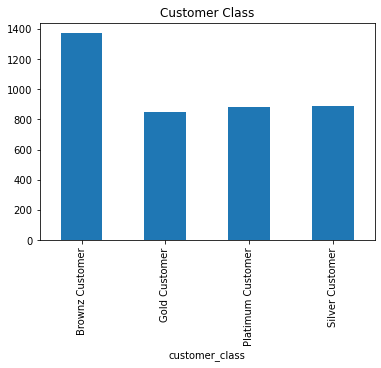

In [37]:
RFM.groupby('customer_class')['customer_id'].count().plot(kind='bar',title='Customer Class')

In [38]:
with pd.ExcelWriter('/Users/xuqinyi/Desktop/KPMG Data Analytics Virtual/Clean KPMG Data.xlsx') as writer:  
        trans.to_excel(writer, sheet_name='Transactions')
        new_customer.to_excel(writer, sheet_name='NewCustomerList')
        cus_demo.to_excel(writer, sheet_name='CustomerDemographic')
        cus_address.to_excel(writer, sheet_name='CustomerAddress')
        cus_2.to_excel(writer, sheet_name='Raw Data')
        RFM.to_excel(writer, sheet_name='RFM')

In [39]:
#Explore the customer demographic
cus_demo['Age'].describe() 

count    3913.000000
mean       44.969333
std        12.796387
min        20.000000
25%        35.000000
50%        45.000000
75%        54.000000
max       179.000000
Name: Age, dtype: float64

In [51]:
cus_demo['age_class'] = np.where((cus_demo['Age']>=20)&(cus_demo['Age']<30), '20-30',
              np.where((cus_demo['Age']>=30)&(cus_demo['Age']<40), '30-40',
              np.where((cus_demo['Age']>=40)&(cus_demo['Age']<50), '40-50',
              np.where((cus_demo['Age']>=50)&(cus_demo['Age']<60), '50-60',
              np.where((cus_demo['Age']>=60)&(cus_demo['Age']<70), '60-70',
              np.where((cus_demo['Age']>=70)&(cus_demo['Age']<80), '70-80',
              np.where((cus_demo['Age']>=80)&(cus_demo['Age']<90), '80-90','Older than 90')))))))

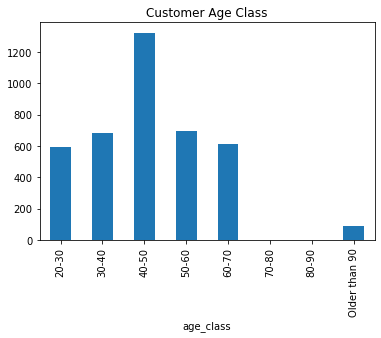

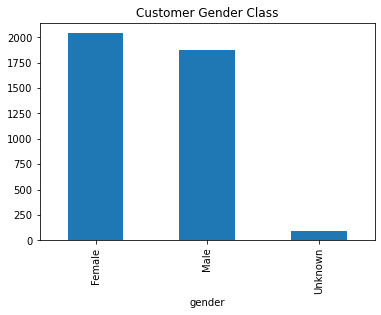

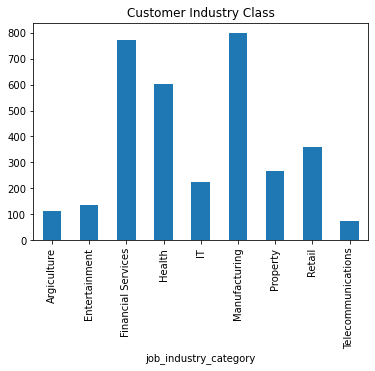

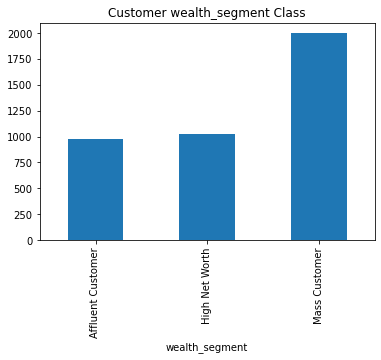

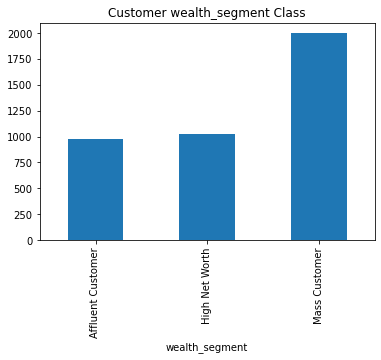

In [52]:
cus_demo.groupby('age_class')['customer_id'].count().plot(kind='bar',title='Customer Age Class')
plt.show()
cus_demo.groupby('gender')['customer_id'].count().plot(kind='bar',title='Customer Gender Class')
plt.show()
cus_demo.groupby('job_industry_category')['customer_id'].count().plot(kind='bar',title='Customer Industry Class')
plt.show()
cus_demo.groupby('wealth_segment')['customer_id'].count().plot(kind='bar',title='Customer wealth_segment Class')
plt.show()
cus_demo.groupby('wealth_segment')['customer_id'].count().plot(kind='bar',title='Customer wealth_segment Class')
plt.show()

In [53]:
cus_demo['past_3_years_bike_related_purchases'].describe()
cus_demo.groupby('past_3_years_bike_related_purchases')['customer_id'].count().to_frame().sort_values('customer_id',ascending=False)

,customer_id
past_3_years_bike_related_purchases,
19,56
16,56
67,54
20,54
2,50
...,...
8,28
85,27
95,27


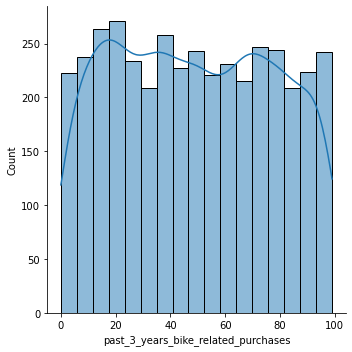

In [54]:
sns.displot(cus_demo, x="past_3_years_bike_related_purchases", kde=True)

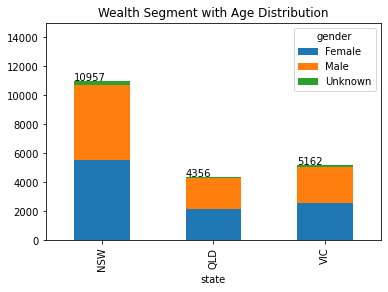

In [56]:
cus_2.groupby('state')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(cus_2.groupby('state') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 15000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

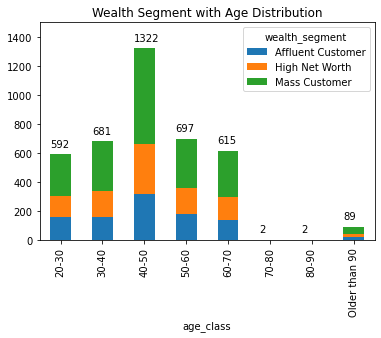

In [59]:
#More Detailed segment visualization
#Wealth Segment with Age Distribution
cus_demo.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(cus_demo.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1500])
plt.title('Wealth Segment with Age Distribution')
plt.show()

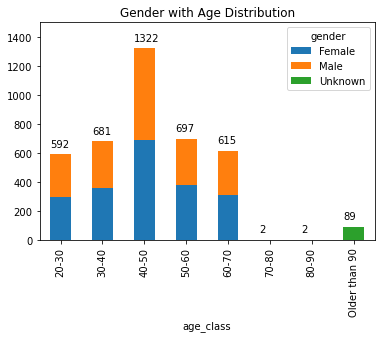

In [60]:
cus_demo.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(cus_demo.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1500])
plt.title('Gender with Age Distribution')
plt.show()

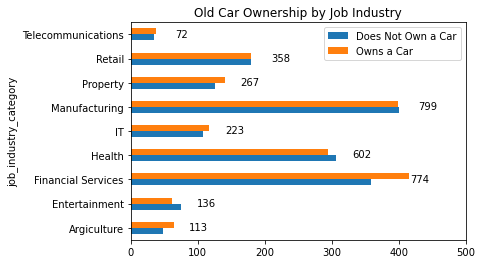

In [61]:
cus_demo.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(cus_demo.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,500])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

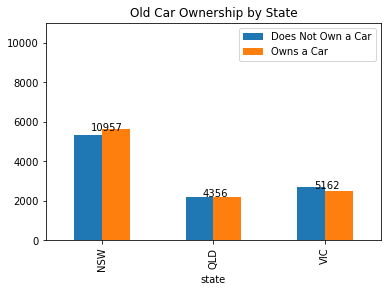

In [62]:
cus_2.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(cus_2.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 11000])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

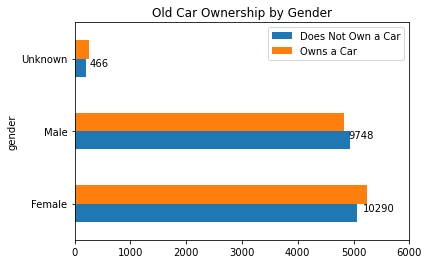

In [63]:
cus_2.groupby('gender')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(cus_2.groupby('gender') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,6000])
plt.title('Old Car Ownership by Gender')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()